In [ ]:
import pandas as pd

# Load the dataset
# file_path = "marriage_data_india.csv"  # Update with the correct path if needed
df = pd.read_csv("marriage_data_india.csv")

# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Marriage_Type         10000 non-null  object
 2   Age_at_Marriage       10000 non-null  int64 
 3   Gender                10000 non-null  object
 4   Education_Level       10000 non-null  object
 5   Caste_Match           10000 non-null  object
 6   Religion              10000 non-null  object
 7   Parental_Approval     10000 non-null  object
 8   Urban_Rural           10000 non-null  object
 9   Dowry_Exchanged       10000 non-null  object
 10  Marital_Satisfaction  10000 non-null  object
 11  Divorce_Status        10000 non-null  object
 12  Children_Count        10000 non-null  int64 
 13  Income_Level          10000 non-null  object
 14  Years_Since_Marriage  10000 non-null  int64 
 15  Spouse_Working        10000 non-null 

In [10]:
# Display first few rows
df.head()

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes


In [11]:
df.describe()

,ID,Age_at_Marriage,Children_Count,Years_Since_Marriage
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,28.503800,2.508800,24.973800
std,2886.89568,6.279564,1.695467,14.054838
min,1.00000,18.000000,0.000000,1.000000
25%,2500.75000,23.000000,1.000000,13.000000
50%,5000.50000,29.000000,3.000000,25.000000
75%,7500.25000,34.000000,4.000000,37.000000
max,10000.00000,39.000000,5.000000,49.000000


In [ ]:
df.describe(include="object")

,Marriage_Type,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Income_Level,Spouse_Working,Inter-Caste,Inter-Religion
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,4,2,5,3,2,3,3,2,3,2,2,2
top,Arranged,Female,Graduate,Same,Hindu,Yes,Urban,No,Medium,No,Middle,Yes,No,No
freq,6022,5109,3943,7071,6034,7014,6046,6002,5001,8999,4983,5047,7032,7972


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'marriage_type', 'age_at_marriage', 'gender', 'education_level',
       'caste_match', 'religion', 'parental_approval', 'urban_rural',
       'dowry_exchanged', 'marital_satisfaction', 'divorce_status',
       'children_count', 'income_level', 'years_since_marriage',
       'spouse_working', 'inter-caste', 'inter-religion'],
      dtype='object')

In [ ]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the Year of Marriage
df["year_of_marriage"] = current_year - df["years_since_marriage"]

# Verify the new column
df.head()

,id,marriage_type,age_at_marriage,gender,education_level,caste_match,religion,parental_approval,urban_rural,dowry_exchanged,marital_satisfaction,divorce_status,children_count,income_level,years_since_marriage,spouse_working,inter-caste,inter-religion,year_of_marriage
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No,1991
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes,1983
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No,2000
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No,2013
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes,1984


In [ ]:
# split data in num and cat
num = df.select_dtypes("number")
cat = df.select_dtypes("object")

In [17]:
num.head()

,id,age_at_marriage,children_count,years_since_marriage,year_of_marriage
0,1,23,5,34,1991
1,2,28,3,42,1983
2,3,39,0,25,2000
3,4,26,0,12,2013
4,5,32,1,41,1984


In [18]:
cat.head()

,marriage_type,gender,education_level,caste_match,religion,parental_approval,urban_rural,dowry_exchanged,marital_satisfaction,divorce_status,income_level,spouse_working,inter-caste,inter-religion
0,Love,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,Middle,No,No,No
1,Love,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,Middle,No,No,Yes
2,Arranged,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,High,No,No,No
3,Arranged,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,High,No,Yes,No
4,Love,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,Middle,No,No,Yes


In [ ]:
from plotly import express as px

# Loop through each categorical column
for col in cat:
    print(f" Value Counts for: {col}\n")
    print(df[col].value_counts(), "\n")

    # Plot bar chart using Plotly
    fig = px.bar(
        df[col].value_counts(),
        x=df[col].value_counts().index,
        y=df[col].value_counts().values,
        title=f"Distribution of {col}",
        labels={"x": col, "y": "Count"},
    )
    fig.show()

 Value Counts for: marriage_type

marriage_type
Arranged    6022
Love        3978
Name: count, dtype: int64 



 Value Counts for: gender

gender
Female    5109
Male      4891
Name: count, dtype: int64 



 Value Counts for: education_level

education_level
Graduate        3943
School          3073
Postgraduate    2018
PhD              966
Name: count, dtype: int64 



 Value Counts for: caste_match

caste_match
Same         7071
Different    2929
Name: count, dtype: int64 



 Value Counts for: religion

religion
Hindu        6034
Muslim       1939
Christian     990
Others        531
Sikh          506
Name: count, dtype: int64 



 Value Counts for: parental_approval

parental_approval
Yes        7014
Partial    1953
No         1033
Name: count, dtype: int64 



 Value Counts for: urban_rural

urban_rural
Urban    6046
Rural    3954
Name: count, dtype: int64 



 Value Counts for: dowry_exchanged

dowry_exchanged
No               6002
Yes              2996
Not Disclosed    1002
Name: count, dtype: int64 



 Value Counts for: marital_satisfaction

marital_satisfaction
Medium    5001
High      2993
Low       2006
Name: count, dtype: int64 



 Value Counts for: divorce_status

divorce_status
No     8999
Yes    1001
Name: count, dtype: int64 



 Value Counts for: income_level

income_level
Middle    4983
Low       2994
High      2023
Name: count, dtype: int64 



 Value Counts for: spouse_working

spouse_working
Yes    5047
No     4953
Name: count, dtype: int64 



 Value Counts for: inter-caste

inter-caste
No     7032
Yes    2968
Name: count, dtype: int64 



 Value Counts for: inter-religion

inter-religion
No     7972
Yes    2028
Name: count, dtype: int64 



In [ ]:
# Calculate the percentage split per Year_of_Marriage
yearly_counts = (
    df.groupby(["year_of_marriage", "marriage_type"]).size().unstack(fill_value=0)
)
yearly_percent = (
    yearly_counts.div(yearly_counts.sum(axis=1), axis=0) * 100
)  # Convert to %
yearly_percent

marriage_type,Arranged,Love
year_of_marriage,,
1976,64.171123,35.828877
1977,70.053476,29.946524
1978,62.702703,37.297297
1979,63.000000,37.000000
1980,64.186047,35.813953
1981,59.905660,40.094340
1982,60.000000,40.000000
1983,59.715640,40.284360
1984,59.633028,40.366972


In [ ]:
# Count occurrences of each marriage type per gender
gender_count = df.groupby(["gender", "marriage_type"]).size().unstack(fill_value=0)

# Convert to percentage (normalize by gender count)
gender_percent = gender_count.div(gender_count.sum(axis=1), axis=0) * 100

# Display percentage distribution
print(gender_percent)


marriage_type   Arranged       Love
gender                             
Female         59.913877  40.086123
Male           60.539767  39.460233


In [ ]:
# Count occurrences of each religion type per gender
religion_count = df.groupby(["gender", "religion"]).size().unstack(fill_value=0)

# Convert to percentage (normalize by gender count)
religion_percent = religion_count.div(gender_count.sum(axis=1), axis=0) * 100

# Display percentage distribution
print(religion_percent)


religion  Christian      Hindu     Muslim    Others      Sikh
gender                                                       
Female     9.571345  61.009982  18.946956  5.186925  5.284792
Male      10.243304  59.640155  19.852791  5.438561  4.825189


In [ ]:
# Count occurrences of each divorce_status type per gender
divorce_status_count = (
    df.groupby(["gender", "divorce_status"]).size().unstack(fill_value=0)
)

# Convert to percentage (normalize by gender count)
divorce_status_percent = (
    divorce_status_count.div(gender_count.sum(axis=1), axis=0) * 100
)

# Display percentage distribution
print(divorce_status_percent)


divorce_status         No        Yes
gender                              
Female          89.626150  10.373850
Male            90.370067   9.629933


In [ ]:
# Count occurrences of each income_level type per gender
income_level_count = df.groupby(["gender", "income_level"]).size().unstack(fill_value=0)

# Convert to percentage (normalize by gender count)
income_level_percent = income_level_count.div(gender_count.sum(axis=1), axis=0) * 100

# Display percentage distribution
print(income_level_percent)


income_level       High        Low     Middle
gender                                       
Female        20.258368  29.966725  49.774907
Male          20.200368  29.912083  49.887549


In [ ]:
# Count occurrences of each marriage type per gender
income_level_count = (
    df.groupby(["gender", "marital_satisfaction"]).size().unstack(fill_value=0)
)

# Convert to percentage (normalize by gender count)
income_level_percent = income_level_count.div(gender_count.sum(axis=1), axis=0) * 100

# Display percentage distribution
print(income_level_percent)


marital_satisfaction       High        Low     Medium
gender                                               
Female                29.712272  20.140928  50.146800
Male                  30.157432  19.975465  49.867103


# Visualise


In [ ]:
import plotly.express as px

df.columns

Index(['id', 'marriage_type', 'age_at_marriage', 'gender', 'education_level',
       'caste_match', 'religion', 'parental_approval', 'urban_rural',
       'dowry_exchanged', 'marital_satisfaction', 'divorce_status',
       'children_count', 'income_level', 'years_since_marriage',
       'spouse_working', 'inter-caste', 'inter-religion', 'year_of_marriage'],
      dtype='object')

In [ ]:
fig = px.histogram(
    df, x="marriage_type", nbins=30, title="Distribution of marriage_type"
)
fig.show()


In [ ]:
fig = px.scatter(
    df,
    x="age_at_marriage",
    y="income_level",
    color="marriage_type",
    title="Marriage Age vs. Income by Marriage Type",
)
fig.show()


In [ ]:
fig = px.box(
    df, x="religion", y="age_at_marriage", title="Marriage Age Distribution by Region"
)
fig.show()


In [ ]:
import plotly.figure_factory as ff
import numpy as np

correlation = num.corr()
fig = ff.create_annotated_heatmap(
    z=correlation.to_numpy(),
    x=list(correlation.columns),
    y=list(correlation.index),
    colorscale="Viridis",
)

fig.update_layout(
    font=dict(
        family="Arial",  # You can change the font family
        size=7,  # Adjust the font size (e.g., 14, 16, 18, etc.)
        color="black",  # Change the font color if needed
    )
)

fig.update_layout(width=700, height=500)  # Adjust values as needed

fig.show()


In [32]:
fig = px.pie(df, names="marriage_type", title="Proportion of Marriage Types", hole=0.4)
fig.show()


In [ ]:
fig = px.box(
    df,
    x="gender",
    y="age_at_marriage",
    color="gender",
    title="Marriage Age Distribution by Gender",
)
fig.show()


In [ ]:
fig = px.violin(
    df,
    x="education_level",
    y="age_at_marriage",
    color="education_level",
    title="Marriage Age Distribution by Education Level",
    box=True,
    points="all",
)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x="income_level",
    nbins=40,
    color="marriage_type",
    title="Income Distribution by Marriage Type",
)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x="divorce_status",
    nbins=40,
    color="marriage_type",
    title="Income Distribution by Marriage Type",
)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x="inter-religion",
    nbins=40,
    color="marriage_type",
    title="Income Distribution by Marriage Type",
)
fig.show()


In [ ]:
fig = px.histogram(
    df,
    x="inter-caste",
    nbins=40,
    color="marriage_type",
    title="Income Distribution by Marriage Type",
)
fig.show()


In [ ]:
fig = px.sunburst(
    df, path=["education_level", "marriage_type"], title="Marriage Type by Region"
)
fig.show()


# ML


In [43]:
%pip install imbalanced-learn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\HOss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Encode cat
for col in cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,id,marriage_type,age_at_marriage,gender,education_level,caste_match,religion,parental_approval,urban_rural,dowry_exchanged,marital_satisfaction,divorce_status,children_count,income_level,years_since_marriage,spouse_working,inter-caste,inter-religion,year_of_marriage
0,1,1,23,1,0,0,1,0,1,0,2,1,5,2,34,0,0,0,1991
1,2,1,28,0,3,1,1,2,0,2,1,0,3,2,42,0,0,1,1983
2,3,0,39,1,2,1,2,2,0,0,2,0,0,0,25,0,0,0,2000
3,4,0,26,0,3,0,1,2,1,2,1,0,0,0,12,0,1,0,2013
4,5,1,32,0,0,1,1,1,0,2,2,0,1,2,41,0,0,1,1984


In [45]:
# Split features & target
X = df.drop(columns=["divorce_status"])  # Features
y = df["divorce_status"]  # Target


In [ ]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

In [ ]:
# Train and evaluate each model using pipelines
for name, model in models.items():
    pipeline = ImbPipeline(steps=[("scaler", StandardScaler()), ("classifier", model)])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Print performance metrics
    print(f"\n🔹 {name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(
        classification_report(y_test, y_pred, zero_division=1)
    )  # Set to 1 or 0 as needed



🔹 Logistic Regression Model Performance:
Accuracy: 0.9119
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1799
           1       0.96      0.86      0.91      1801

    accuracy                           0.91      3600
   macro avg       0.92      0.91      0.91      3600
weighted avg       0.92      0.91      0.91      3600


🔹 Random Forest Model Performance:
Accuracy: 0.8831
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1799
           1       0.89      0.87      0.88      1801

    accuracy                           0.88      3600
   macro avg       0.88      0.88      0.88      3600
weighted avg       0.88      0.88      0.88      3600


🔹 Gradient Boosting Model Performance:
Accuracy: 0.8111
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1799
           1       0.81      0.81      0.81      1801

    accuracy 

C:\Users\HOss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\HOss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Progr


🔹 K-Nearest Neighbors Model Performance:
Accuracy: 0.7939
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1799
           1       0.74      0.90      0.81      1801

    accuracy                           0.79      3600
   macro avg       0.81      0.79      0.79      3600
weighted avg       0.81      0.79      0.79      3600


🔹 Naive Bayes Model Performance:
Accuracy: 0.7622
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1799
           1       0.75      0.79      0.77      1801

    accuracy                           0.76      3600
   macro avg       0.76      0.76      0.76      3600
weighted avg       0.76      0.76      0.76      3600


🔹 Decision Tree Model Performance:
Accuracy: 0.8092
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1799
           1       0.79      0.84      0.81      1801

    accuracy       

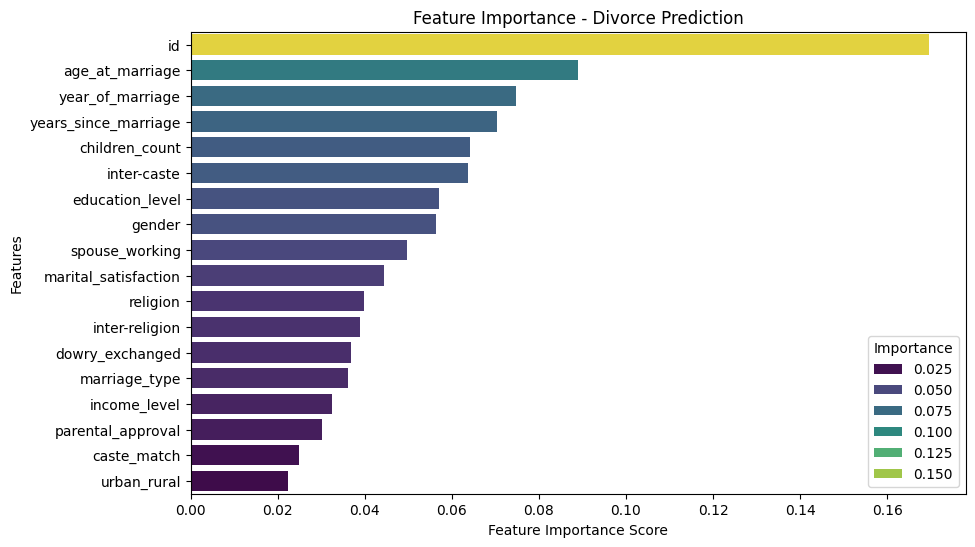

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get feature importance
importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": model.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importance_df["Importance"],
    y=importance_df["Feature"],
    hue=importance_df["Importance"],
    palette="viridis",
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Divorce Prediction")
plt.show()
